# Análisis Exploratorio de Datos: Felicidad Global 2011–2024

Este notebook realiza un análisis exploratorio sobre los factores que influyen en el nivel de felicidad de los países a lo largo del tiempo, utilizando datos del World Happiness Report.


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

In [6]:
# Ruta de los archivos de datos (dataset)
ruta = "../data/Data+for+Figure+2.1+(2011–2024).xlsx"

# cargar el archivo con pandas
df = pd.read_excel(ruta)

# Mostrar las primeras filas del dataframe para verificar que se ha cargado correctamente
print(df.head())

   Year  Rank Country name  Ladder score  upperwhisker  lowerwhisker  \
0  2024     1      Finland         7.736         7.810         7.662   
1  2023   143  Afghanistan         1.721         1.775         1.667   
2  2022   137  Afghanistan         1.859         1.923         1.795   
3  2021   146  Afghanistan         2.404         2.469         2.339   
4  2020   150  Afghanistan         2.523         2.596         2.449   

   Explained by: Log GDP per capita  Explained by: Social support  \
0                             1.749                         1.783   
1                             0.628                         0.000   
2                             0.645                         0.000   
3                             0.758                         0.000   
4                             0.370                         0.000   

   Explained by: Healthy life expectancy  \
0                                  0.824   
1                                  0.242   
2                   

In [7]:
# Ver el tamaño real del dataset

df.shape

(1969, 13)

### Ver las columnas con sus nombres y tipos de datos

In [8]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1969 entries, 0 to 1968
Data columns (total 13 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Year                                        1969 non-null   int64  
 1   Rank                                        1969 non-null   int64  
 2   Country name                                1969 non-null   object 
 3   Ladder score                                1969 non-null   float64
 4   upperwhisker                                875 non-null    float64
 5   lowerwhisker                                875 non-null    float64
 6   Explained by: Log GDP per capita            872 non-null    float64
 7   Explained by: Social support                872 non-null    float64
 8   Explained by: Healthy life expectancy       870 non-null    float64
 9   Explained by: Freedom to make life choices  871 non-null    float64
 10  Explained by

In [9]:
df.dtypes

Year                                            int64
Rank                                            int64
Country name                                   object
Ladder score                                  float64
upperwhisker                                  float64
lowerwhisker                                  float64
Explained by: Log GDP per capita              float64
Explained by: Social support                  float64
Explained by: Healthy life expectancy         float64
Explained by: Freedom to make life choices    float64
Explained by: Generosity                      float64
Explained by: Perceptions of corruption       float64
Dystopia + residual                           float64
dtype: object

### Ver los primeros registros con todas las columnas visibles

In [10]:
with pd.option_context('display.max_columns', None):
    display(df.head(10))

,Year,Rank,Country name,Ladder score,upperwhisker,lowerwhisker,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,2024,1,Finland,7.7360,7.81000,7.66200,1.749000,1.783000,0.824000,0.986,0.110000,0.502000,1.782000
1,2023,143,Afghanistan,1.7210,1.77500,1.66700,0.628000,0.000000,0.242000,0.000,0.091000,0.088000,0.672000
2,2022,137,Afghanistan,1.8590,1.92300,1.79500,0.645000,0.000000,0.087000,0.000,0.093000,0.059000,0.976000
3,2021,146,Afghanistan,2.4040,2.46900,2.33900,0.758000,0.000000,0.289000,0.000,0.089000,0.005000,1.263000
4,2020,150,Afghanistan,2.5230,2.59600,2.44900,0.370000,0.000000,0.126000,0.000,0.122000,0.010000,1.895000
5,2019,153,Afghanistan,2.5669,2.62827,2.50553,0.300706,0.356434,0.266052,0.000,0.135235,0.001226,1.507236
6,2018,154,Afghanistan,3.2030,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2017,145,Afghanistan,3.6320,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2016,141,Afghanistan,3.7940,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2015,154,Afghanistan,3.3600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Vemos cuantos países y años hay en total en el dataframe

In [11]:
print("Total de países:", df['Country name'].nunique())
print("Total de años:", df['Year'].nunique())

Total de países: 169
Total de años: 13


#### Vamos a documentar las columnas con el fin de poder explicar el significado de cada columna

#### 🧾 Descripción de las columnas del dataset - World Happiness Report

| Columna                                 | Descripción                                                                 |
|-----------------------------------------|------------------------------------------------------------------------------|
| `Year`                                  | Año en el que se midieron los datos.                                        |
| `Country name`                          | Nombre del país.                                                            |
| `Ladder score`                          | Puntuación general de felicidad (escala 0 a 10).                            |
| `Rank`                                  | Posición del país en el ranking global de felicidad.                        |
| `upperwhisker` / `lowerwhisker`         | Límites superior e inferior del intervalo de confianza del `Ladder score`. |
| `Explained by: Log GDP per capita`      | Parte del score explicada por el ingreso per cápita del país (logarítmico).|
| `Explained by: Social support`          | Parte explicada por el apoyo social (familia, amigos, red de ayuda).       |
| `Explained by: Healthy life expectancy` | Parte explicada por la expectativa de vida saludable.                       |
| `Explained by: Freedom to make life choices` | Parte explicada por la libertad percibida para tomar decisiones.       |
| `Explained by: Generosity`              | Parte explicada por la generosidad (donaciones, altruismo).                |
| `Explained by: Perceptions of corruption` | Parte explicada por la corrupción percibida en gobierno/sociedad.        |
| `Dystopia + residual`                   | Valor residual para completar el `Ladder score` (modelo interno).          |


#### ¿Qué estamos analizando?

Cada fila representa un país en un año determinado.  
El objetivo es entender qué factores (PIB, salud, libertad, etc.) están más relacionados con la felicidad de los países según el World Happiness Report.

La columna `Ladder score` es la puntuación total de felicidad, y las columnas que empiezan por `Explained by:` explican cómo se construye ese score.

Antes de seguir con limpieza o visualización, es importante tener claro **qué mide cada variable** y **qué tipo de análisis nos interesa realizar** (por ejemplo: comparaciones por país, evolución temporal, correlaciones entre factores...).


#### Visualización general del dataset con los datos que tenemos completos (antes de la limpieza)

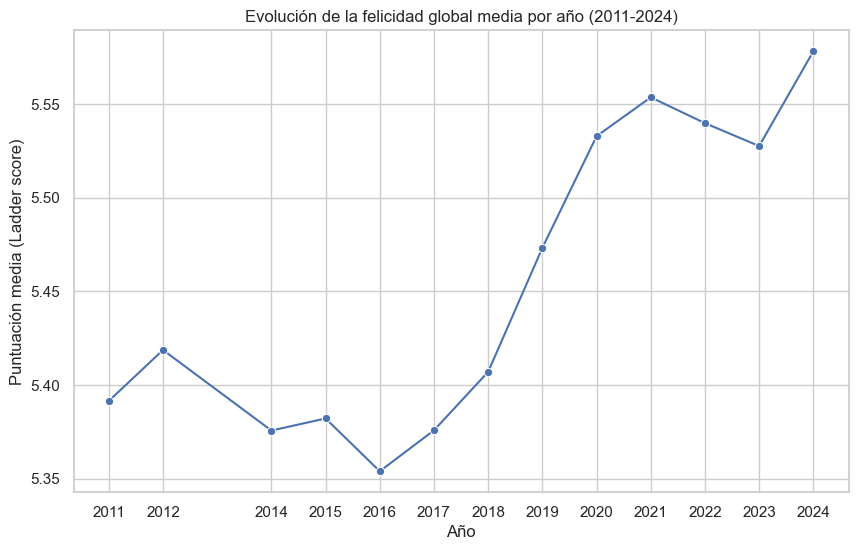

In [12]:
# Calcular la media de felicidad global por año
media_anual = df.groupby('Year')['Ladder score'].mean().reset_index()

# Gráfico de línea: evolución de la felicidad global media
sns.lineplot(data=media_anual, x='Year', y='Ladder score', marker = 'o')
plt.title("Evolución de la felicidad global media por año (2011-2024)")
plt.ylabel("Puntuación media (Ladder score)")
plt.xlabel("Año")
plt.xticks(media_anual['Year'].unique())
plt.grid(True)
plt.show()


In [13]:
# ¿Cuál es el último año con valores completos en Ladder score?
df['Year'].max()


np.int64(2024)

### Ver los países más felices en el último año con datos completos

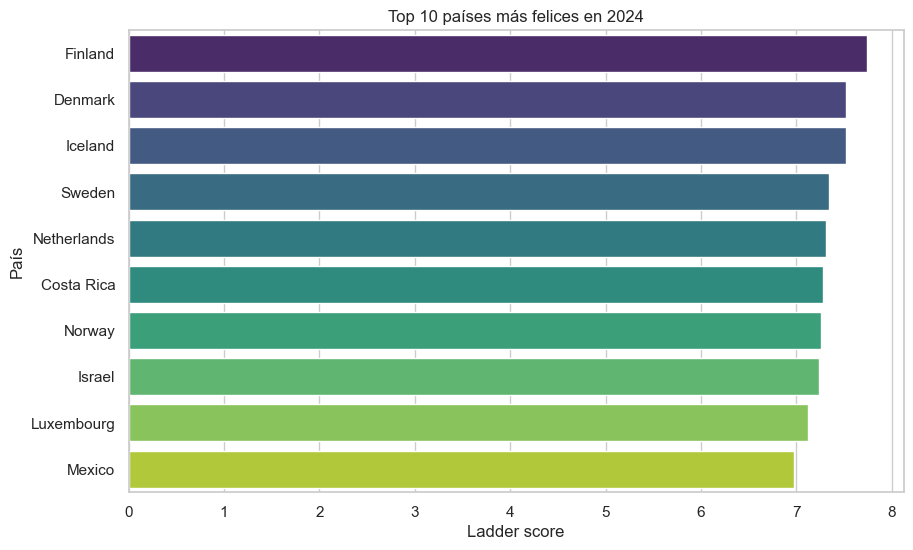

In [14]:
# Filtrar solo el último año disponible
ultimo_anio = df['Year'].max()
df_ultimo_anio = df[df['Year'] == ultimo_anio]

# Mostrar los 10 países más felices
top_10 = df_ultimo_anio.sort_values('Ladder score', ascending=False).head(10)

# Gráfico de barras
sns.barplot(
    data=top_10,
    x='Ladder score',
    y='Country name',
    hue='Country name',
    palette='viridis',
    legend=False
)
plt.title(f"Top 10 países más felices en {ultimo_anio}")
plt.xlabel("Ladder score")
plt.ylabel("País")
plt.show()


### Ver los países menos felices en el último año disponible

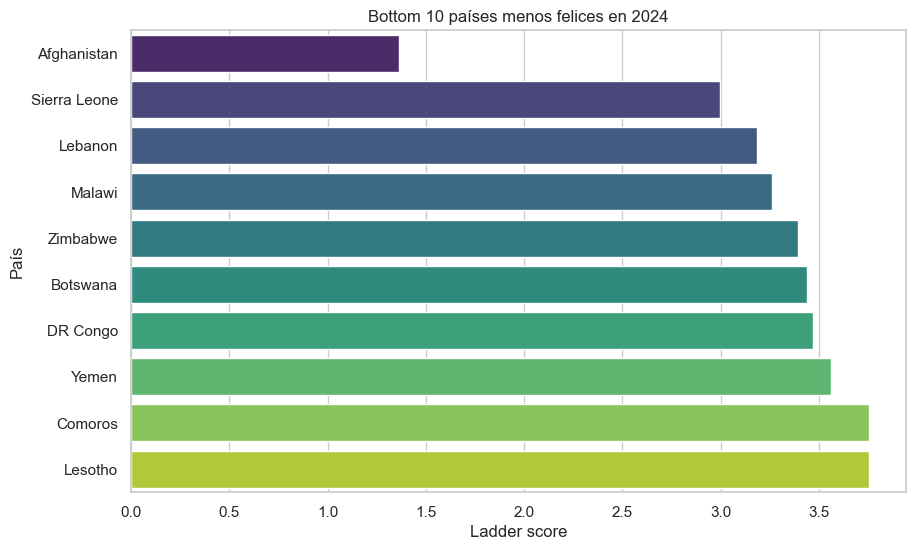

In [15]:
# Filtar solo el último año disponible

ultimo_anio = df['Year'].max()
df_ultimo_anio = df[df['Year'] == ultimo_anio]

# Mostrar los 10 países menos felices
bottom_10 = df_ultimo_anio.sort_values('Ladder score', ascending=True).head(10)

# Gráfico de barras
sns.barplot(
    data=bottom_10,
    x='Ladder score',
    y='Country name',
    hue='Country name',
    palette='viridis',
    legend=False
)
plt.title(f"Bottom 10 países menos felices en {ultimo_anio}")
plt.xlabel("Ladder score")
plt.ylabel("País")
plt.show()


### Ver comparativa entre año más antiguo y más reciente

In [16]:
# Filtrar el año más antiguo y el más reciente
primer_anio = df['Year'].min()
ultimo_anio = df['Year'].max()
print("Primer año:", primer_anio)
print("Último año:", ultimo_anio)

df_inicio_fin = df[df['Year'].isin([primer_anio, ultimo_anio])]

# Pivotar para comparar
pivot_long = df_inicio_fin.pivot(index='Country name', columns='Year', values='Ladder score')
pivot_long.dropna(inplace=True)
pivot_long['Diferencia'] = pivot_long[ultimo_anio] - pivot_long[primer_anio]

#Mostrar los países que más han mejorado
mejores = pivot_long.sort_values('Diferencia', ascending=False).head(10)
peores = pivot_long.sort_values('Diferencia', ascending=True).head(10)

Primer año: 2011
Último año: 2024


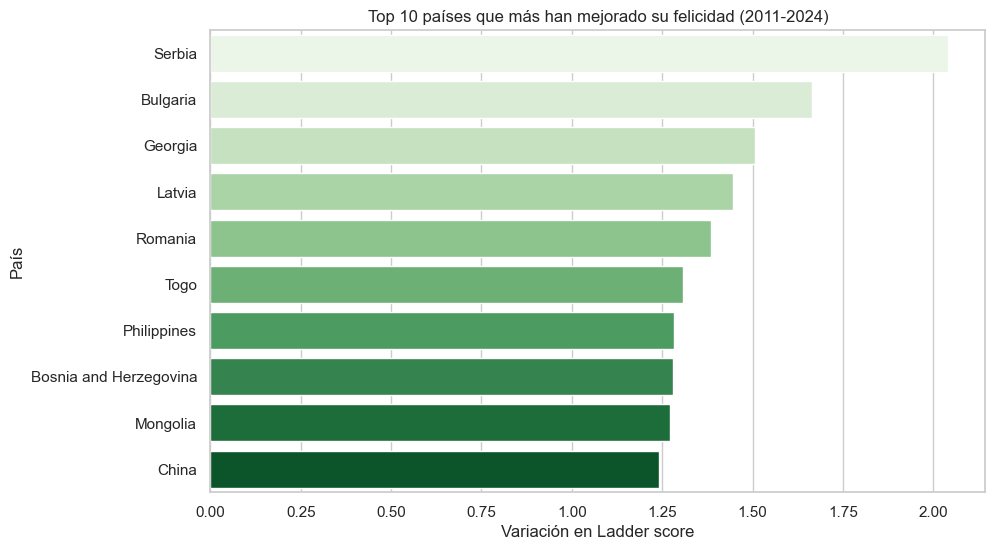

In [17]:
sns.barplot(data=mejores.reset_index(), x='Diferencia', y='Country name', palette='Greens', hue='Country name')
plt.title("Top 10 países que más han mejorado su felicidad (2011-2024)")
plt.xlabel("Variación en Ladder score")
plt.ylabel("País")
plt.show()


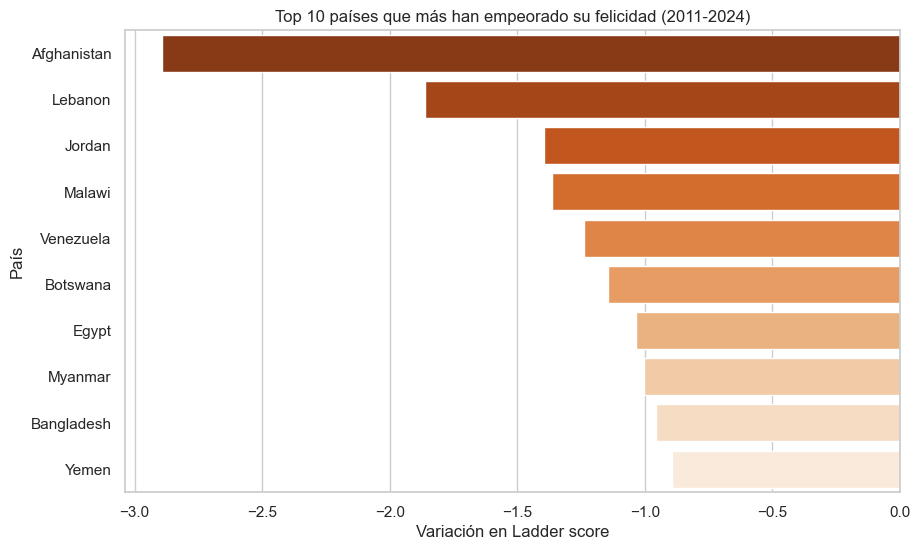

In [18]:
sns.barplot(data=peores.reset_index(), x='Diferencia', y='Country name', palette='Oranges_r', hue='Country name')
plt.title("Top 10 países que más han empeorado su felicidad (2011-2024)")
plt.xlabel("Variación en Ladder score")
plt.ylabel("País")
plt.show()


### 📊 Reflexión: Evolución de la felicidad global (2011–2024)

El análisis de la evolución de la felicidad entre 2011 y 2024 revela dos tendencias claras:

- 🟢 **Países que más han mejorado**: Serbia, Bulgaria, Georgia, Rumanía o Filipinas muestran un crecimiento significativo en su `Ladder score`. Muchos de estos países han atravesado procesos de estabilización política, integración europea o mejoras socioeconómicas en la última década.

- 🔴 **Países que más han empeorado**: Afganistán, Líbano, Jordania, Venezuela o Yemen han sufrido importantes retrocesos. Estos descensos reflejan contextos de **conflictos, crisis humanitarias o inestabilidad política y económica** que afectan directamente al bienestar de sus ciudadanos.

Estos resultados nos ayudan a entender que la felicidad no depende solo del desarrollo económico, sino también de **la estabilidad, la seguridad, la salud, y la gobernabilidad**. Este análisis aporta una visión valiosa antes de centrarnos en los factores que explican estos resultados.

### Lo que refleja este análisis:

- Correlación entre contextos geopolíticos y bienestar subjetivo.

- La herramienta Ladder score sí capta las grandes dinámicas sociales.

- La visualización sirve como base para formular hipótesis que luego contrastaremos con los factores (GDP, freedom, corruption, etc.).

### ✳️ Resumen del análisis exploratorio - Parte 1: Visualización general

Durante esta primera fase del análisis exploratorio del *World Happiness Report (2011–2024)*, se han llevado a cabo los siguientes pasos:

#### ⚙️ 1. Preparación del entorno
- Importación de librerías clave: `pandas`, `numpy`, `matplotlib`, `seaborn`.
- Carga y exploración inicial del dataset `.xlsx`.
- Revisión de estructura general, tipos de datos y valores nulos por columna.
- Documentación completa del significado de cada columna.

#### 👁️ 2. Visualización general y exploración de tendencias
- Evolución de la felicidad media global por año (`Ladder score`).
- Ranking de los países más felices y menos felices en el año más reciente disponible.
- Análisis comparativo de evolución entre 2011 y 2024:
  - 🔼 Países que más han **mejorado** su nivel de felicidad (ej. Serbia, Bulgaria, Georgia).
  - 🔽 Países que más han **empeorado** (ej. Afganistán, Líbano, Venezuela).

#### 📑 Conclusión de esta fase
Este análisis preliminar permite visualizar tendencias claras y contextualizar los datos antes de proceder a la limpieza y estudio de los factores que explican el `Ladder score`.

---

## Limpieza de datos.
1. 🔹Creamos un `df_limpio` con solo las filas completas en los factores explicativos 
    * Esto nos dará un subconjunto sólido sobre el que hacer análisis de correlación y visualizaciones claras.
2. 🔹Ver cuántos datos nos quedamos y si hay suficiente variedad de países y años
    * Así evaluamos si podemos sacar conclusiones significativas.

In [19]:
# Lista de columnas explicativas
columnas_factores = [
    'Explained by: Log GDP per capita',
    'Explained by: Social support',
    'Explained by: Healthy life expectancy',
    'Explained by: Freedom to make life choices',
    'Explained by: Generosity',
    'Explained by: Perceptions of corruption',
    'Dystopia + residual'
]

# Crear una copia con solo las filas completas
df_limpio = df.dropna(subset=columnas_factores).copy()

# Verificar tamaño del nuevo dataset
print("Filas originales:", df.shape[0])
print("Filas después de limpieza:", df_limpio.shape[0])


Filas originales: 1969
Filas después de limpieza: 868


In [20]:
print("Años únicos:", df_limpio['Year'].unique())
print("Número de países únicos:", df_limpio['Country name'].nunique())

# Número de registros por año
df_limpio['Year'].value_counts().sort_index()


Años únicos: [2024 2023 2022 2021 2020 2019]
Número de países únicos: 157


Year
2019    153
2020    149
2021    146
2022    136
2023    140
2024    144
Name: count, dtype: int64

#### Comprobamos y eliminamos duplicados

In [21]:
# ¿Cuántas filas duplicadas hay?
duplicados = df_limpio.duplicated().sum()
print("Duplicados encontrados:", duplicados)

# Si hay duplicados, eliminarlos
if duplicados > 0:
    df_limpio.drop_duplicates(inplace=True)
    print("Duplicados eliminados.")
else:
    print("No se encontraron duplicados.")


Duplicados encontrados: 0
No se encontraron duplicados.


#### Verificar tipos de datos

In [22]:
# Ver tipos de dato por columna
df_limpio.dtypes


Year                                            int64
Rank                                            int64
Country name                                   object
Ladder score                                  float64
upperwhisker                                  float64
lowerwhisker                                  float64
Explained by: Log GDP per capita              float64
Explained by: Social support                  float64
Explained by: Healthy life expectancy         float64
Explained by: Freedom to make life choices    float64
Explained by: Generosity                      float64
Explained by: Perceptions of corruption       float64
Dystopia + residual                           float64
dtype: object

### ✅ Se ha realizado una limpieza final del dataset

- Se ha verificado la presencia de duplicados: eliminados si existían.
- Se han revisado los tipos de datos de todas las columnas.
- El dataframe `df_limpio` está preparado para el análisis por factores, conteniendo solo filas con información completa y fiable.
---

## Análisis univariado de factores.

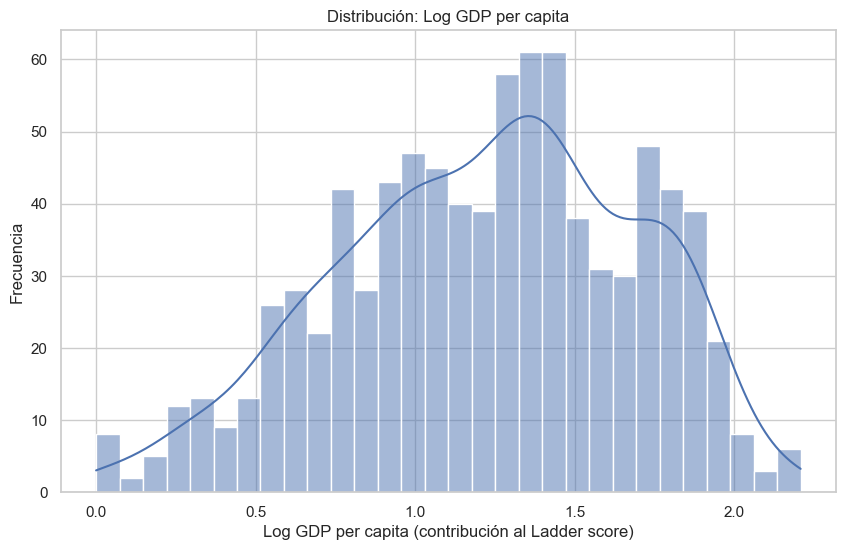

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Histograma del PIB per cápita (logarítmico)
sns.histplot(data=df_limpio, x='Explained by: Log GDP per capita', kde=True, bins=30)
plt.title('Distribución: Log GDP per capita')
plt.xlabel('Log GDP per capita (contribución al Ladder score)')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()


### 📊 Análisis univariado: Log GDP per capita

Este gráfico muestra la distribución de la contribución del PIB per cápita (en escala logarítmica) al índice de felicidad (`Ladder score`) entre países.

- La mayoría de países tienen una contribución entre **1.0 y 1.5 puntos**.
- Hay una pequeña cantidad de países muy pobres (valores cercanos a 0).
- También existen países con valores muy altos, próximos a 2.0 (muy desarrollados económicamente).
- La distribución muestra una leve inclinación hacia la izquierda, lo que indica que **el PIB suele tener un impacto medio-alto en la mayoría de países**, con pocos extremos.

Esto nos sugiere que el nivel económico del país tiene un peso importante en el bienestar percibido, pero no es homogéneo en todos los casos.

---

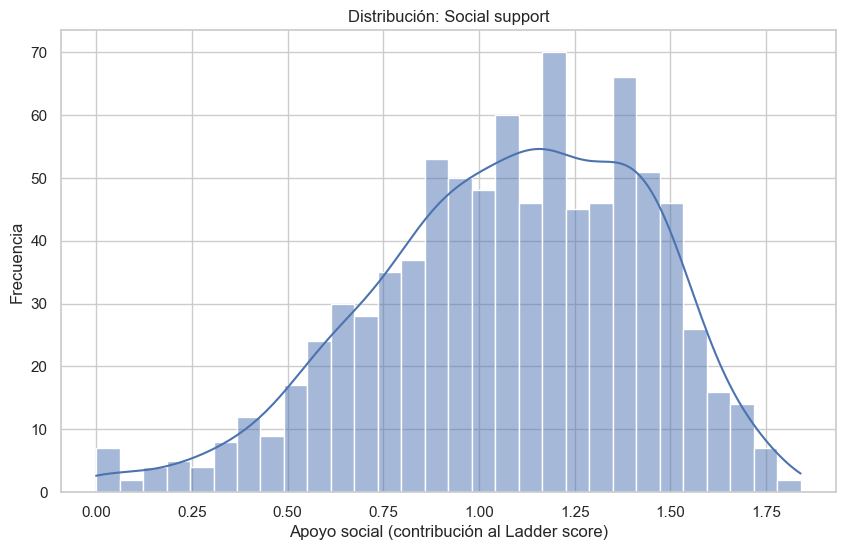

In [24]:
# Histograma del factor Social support
sns.histplot(data=df_limpio, x='Explained by: Social support', kde=True, bins=30)
plt.title('Distribución: Social support')
plt.xlabel('Apoyo social (contribución al Ladder score)')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()


### 📊 Análisis univariado: Social support

Este gráfico muestra la distribución de la contribución del apoyo social al `Ladder score`.

- La mayoría de los países tienen valores entre **1.0 y 1.5**, lo que indica una alta influencia del apoyo social en el bienestar subjetivo.
- Muy pocos países se sitúan por debajo de 0.5 o por encima de 1.75.
- La forma de la distribución es parecida a la del PIB per cápita, lo que sugiere que el apoyo social también es un factor ampliamente relevante y comúnmente alto entre países.

Aunque parece ser un factor fuerte, necesitaremos observar su correlación con el `Ladder score` para confirmar su peso real en la felicidad global.

---


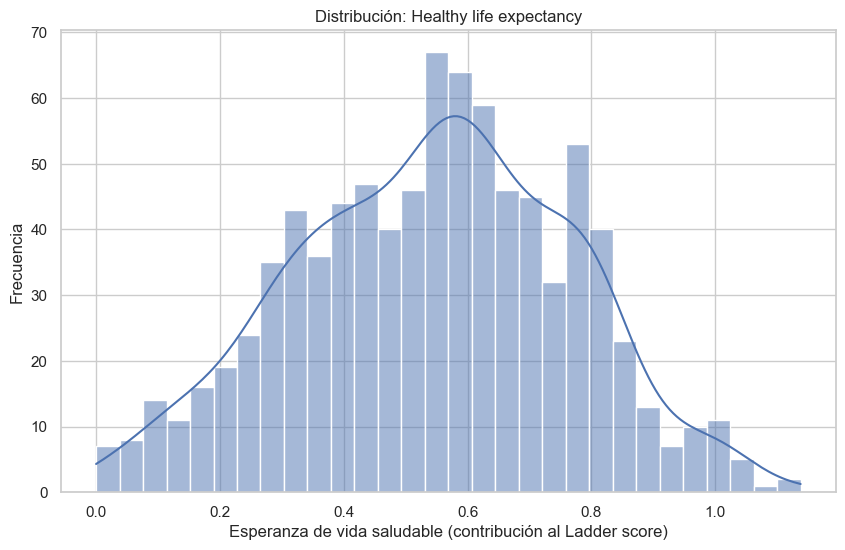

In [25]:
# Histograma del factor Healthy life expectancy
sns.histplot(data=df_limpio, x='Explained by: Healthy life expectancy', kde=True, bins=30)
plt.title('Distribución: Healthy life expectancy')
plt.xlabel('Esperanza de vida saludable (contribución al Ladder score)')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()


### 📊 Análisis univariado: Healthy life expectancy

Este gráfico muestra la distribución de la contribución de la esperanza de vida saludable al índice de felicidad (`Ladder score`).

- La mayoría de los países presentan valores entre **0.4 y 0.7**, lo que indica una aportación media al bienestar.
- La distribución es bastante simétrica, con pocos países por debajo de 0.2 o por encima de 0.9.
- A diferencia de factores como el PIB o el apoyo social, **las diferencias entre países son menos extremas**, lo que sugiere una cierta homogeneidad en este indicador a nivel global.

Aunque su variabilidad es menor, sigue siendo un factor importante que influye de forma estable en la felicidad de los países.

---

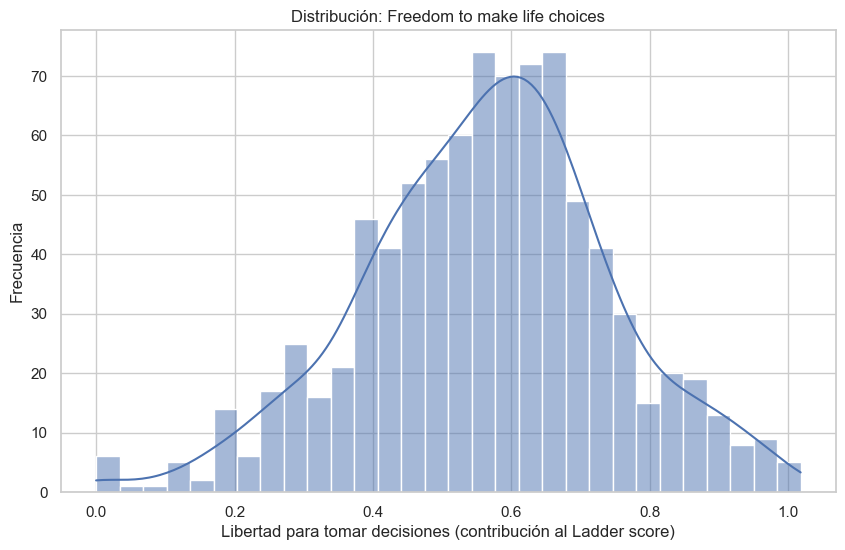

In [26]:
# Histograma del factor Freedom to make life choices
sns.histplot(data=df_limpio, x='Explained by: Freedom to make life choices', kde=True, bins=30)
plt.title('Distribución: Freedom to make life choices')
plt.xlabel('Libertad para tomar decisiones (contribución al Ladder score)')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()


### 📊 Análisis univariado: Freedom to make life choices

Esta variable mide la percepción que tienen los ciudadanos sobre su libertad para tomar decisiones importantes en su vida.

- La mayoría de países tienen valores entre **0.4 y 0.7**, con un pico cercano a **0.6**.
- Hay pocos países con valores extremadamente bajos (por debajo de 0.2) o extremadamente altos (cercanos a 1).
- La distribución tiene forma ligeramente asimétrica, pero está bien concentrada en la zona media.

Este patrón sugiere que la libertad para tomar decisiones tiene una **influencia estable y significativa en la felicidad**, aunque con menor variabilidad entre países que otros factores como el PIB.

---

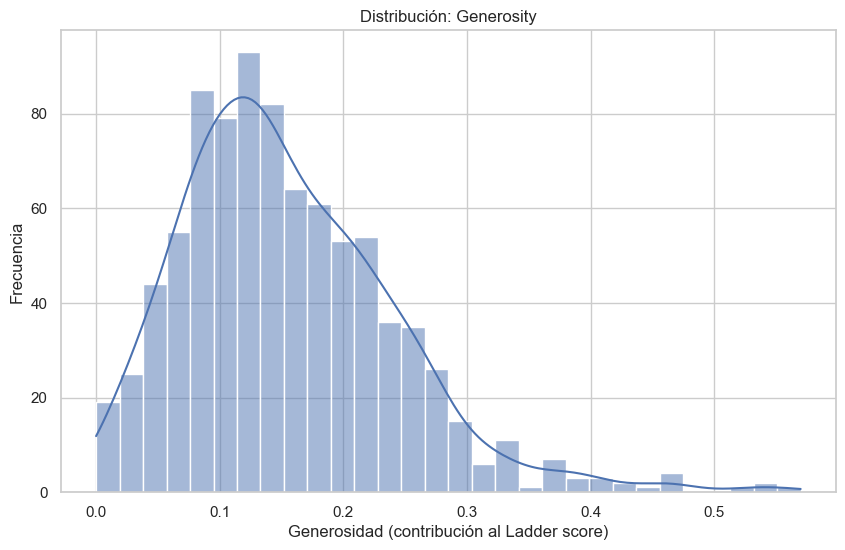

In [27]:
# Histograma del factor Generosity
sns.histplot(data=df_limpio, x='Explained by: Generosity', kde=True, bins=30)
plt.title('Distribución: Generosity')
plt.xlabel('Generosidad (contribución al Ladder score)')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()


### 📊 Análisis univariado: Generosity

Este gráfico muestra la distribución de la contribución de la generosidad (medida como donaciones recientes) al índice de felicidad (`Ladder score`).

- La gran mayoría de países se sitúa por debajo de **0.2**, con un pico claro entre **0.1 y 0.15**.
- La distribución está claramente sesgada hacia la derecha, con pocos países que superan el 0.3.
- Esto sugiere que, aunque la generosidad pueda tener valor cultural o moral, **su impacto numérico en el índice de felicidad es bajo** en comparación con otros factores.

Podría ser relevante en casos concretos, pero **no parece ser un factor globalmente determinante**.

---

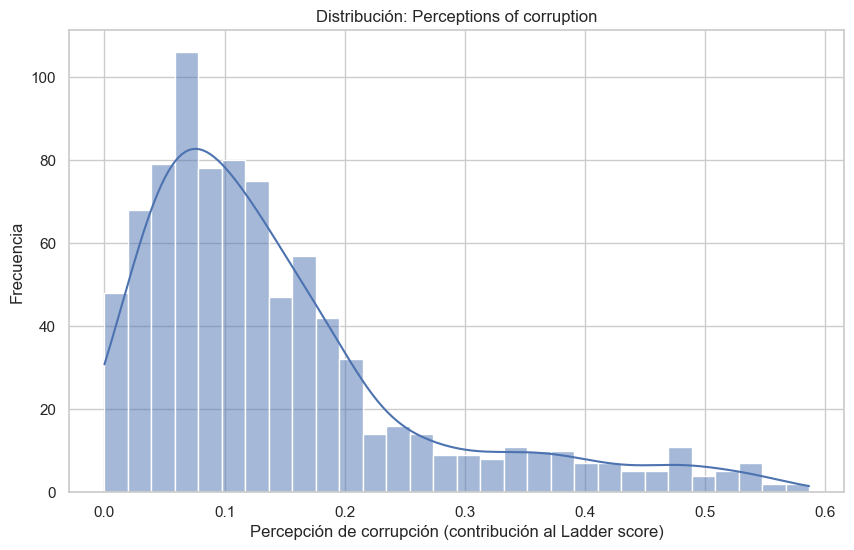

In [28]:
# Histograma del factor Perceptions of corruption
sns.histplot(data=df_limpio, x='Explained by: Perceptions of corruption', kde=True, bins=30)
plt.title('Distribución: Perceptions of corruption')
plt.xlabel('Percepción de corrupción (contribución al Ladder score)')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()


### 📊 Análisis univariado: Perceptions of corruption

Este gráfico muestra la distribución de la contribución de la percepción de corrupción al índice de felicidad (`Ladder score`).

- La mayoría de países se sitúan entre **0.05 y 0.2**, lo que refleja una percepción generalizada de corrupción en el mundo.
- Hay muy pocos países que superen 0.3, y casi ninguno llega al 0.6.
- La distribución es **claramente asimétrica hacia la derecha**, con un pico pronunciado cerca de 0.1.

Aunque este factor tiene poca variabilidad y un impacto numérico bajo, su concentración en valores negativos sugiere que la percepción de corrupción **afecta a muchos países**, limitando su nivel de felicidad percibida.

---


## ✅ Resumen final – Análisis univariado de los factores explicativos

Durante esta fase hemos analizado uno por uno los factores que contribuyen al índice de felicidad (`Ladder score`), observando su distribución y comportamiento individual:

- **Log GDP per capita**: Factor económico con una amplia variabilidad entre países. Tiene un impacto claro y estable en la felicidad.
- **Social support**: Factor social ampliamente distribuido en niveles altos. Uno de los más homogéneos y relevantes.
- **Healthy life expectancy**: Factor sanitario con rango estrecho, lo que sugiere homogeneidad global en salud.
- **Freedom to make life choices**: Valor percibido moderado-alto en la mayoría de países. Influyente, pero con menor variabilidad.
- **Generosity**: Contribución baja en casi todos los países. Poca variabilidad y escaso peso global.
- **Perceptions of corruption**: Valor bajo en la mayoría de países. Aunque su impacto directo es pequeño, afecta negativamente a muchas sociedades.

> Este análisis nos permite entender cómo se comporta cada variable individualmente antes de analizar cómo se relacionan entre ellas y con el `Ladder score`.

---

La próxima fase se centrará en:
- Analizar las **correlaciones** entre variables
- Estudiar la **relación directa con el índice de felicidad**
- Detectar los **factores más influyentes**

